In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Number of sampling

In [2]:
N = 10000

# Constraints

$R1$ in range $[350000,750000]\ {\rm \Omega}$

$R2$ in range $[40000, 80000]\ {\rm \Omega}$

$W1$ in range $[80,600]\ {\rm \mu m}$

$L1$ in range $[80,200]\ {\rm \mu m}$

$W2$ in range $[500,800]\ {\rm \mu m}$

$L2$ in range $[40,80]\ {\rm \mu m}$

In [3]:
range_r1  = [350000, 750000]
range_r2  = [40000, 80000]
range_w1 = [80, 600]
range_l1 = [80, 200]
range_w2 = [500, 800]
range_l2 = [40, 80]

In [4]:
RANGE = torch.tensor([range_r1, range_r2, range_w1, range_l1, range_w2, range_l2])

In [5]:
ACT_sampling_mc =  torch.quasirandom.SobolEngine(6).draw(N)
ACT_sampling_mc = ACT_sampling_mc*(RANGE[:,1]-RANGE[:,0]) + RANGE[:,0]
ACT_sampling_mc = np.round(ACT_sampling_mc).T
ACT_sampling_mc.shape

torch.Size([6, 10000])

In [6]:
ACT_sampling_mc[2:,:] = ACT_sampling_mc[2:,:]/1000000
ACT_sampling_mc

tensor([[3.5000e+05, 5.5000e+05, 6.5000e+05,  ..., 6.7683e+05, 5.7683e+05,
         3.7683e+05],
        [4.0000e+04, 6.0000e+04, 5.0000e+04,  ..., 6.6858e+04, 5.6858e+04,
         7.6858e+04],
        [8.0000e-05, 3.4000e-04, 2.1000e-04,  ..., 4.6100e-04, 3.3100e-04,
         5.9100e-04],
        [8.0000e-05, 1.4000e-04, 1.1000e-04,  ..., 9.1000e-05, 1.8100e-04,
         1.2100e-04],
        [5.0000e-04, 6.5000e-04, 7.2500e-04,  ..., 7.9200e-04, 7.1700e-04,
         5.6700e-04],
        [4.0000e-05, 6.0000e-05, 7.0000e-05,  ..., 7.5000e-05, 6.5000e-05,
         4.5000e-05]])

In [7]:
np.savetxt('./data/sampling_sigmoid.csv', ACT_sampling_mc, fmt='%f', delimiter=',')

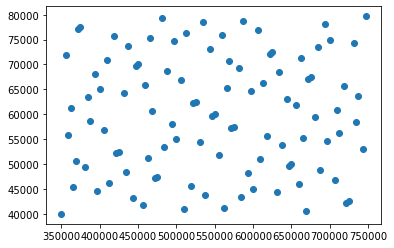

In [8]:
plt.scatter(ACT_sampling_mc[0,:100],ACT_sampling_mc[1,:100])